# Support Vector Machine

*The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(**N** — the number of features) that distinctly classifies the data points.*[[2](#section3)]

**Advantages**:
- Effective in high dimensional spaces and where number of dimensions > number of samples
- Memory Efficient
- Different Kernel functions can be specified
<br>
**Disadvantages**:
- Doesn't provide probability estimates[[3](#section4)]

SVM constructs a *hyperplane* or set of *hyperplanes* in a high- or infinite-dimensional space, which can be used for **classification**, **regression**, or other tasks like **outliers detection**.[[4](#section5)]

**Hyperplane**
<br>
If a classification task only has 2 features(or 2 dimensions), then a ***hyperplane*** would be a simple regression line that linearly separates and classifies a set of data on a 2D graph. When this ***hyperplane*** is defined, we can now use it classify data points. Any point to one side of a line is classified as group *A*, any point on the other side is classified as group *B*. The further a data point is from the ***hyperplane***, the probabilty that it has been classified correctly increases. This means that when new testing data is added, the side of the hyperplane it lands on decides the class it is assigned to.[[6](#section7)]

<img src="images/gif.gif" width="750" align="center">

*While there could be multiple hyperplanes, SVM tries to find the one that best seperates 2 categories.*[[5](#section6)]

<a id="reference"></a>

## Setup


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from itertools import product
import seaborn as sns

*In this classification I've used one of the datasets provided by sklearn library, more info can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html?highlight=digits#sklearn.datasets.load_digits).*

## Uploading the Digits dataset

In [2]:
# Loadging the datsaet. This dataset contains 1797 8-by-8 images of handwritten digits.
digits = datasets.load_digits()
X = digits.data
y = digits.target
images = digits.images.astype(np.int_)
n_classes = 10

# Scale the digits for numerical stability
X /= 16

# Shuffle the data and split them into training and testing sets
test_size = 1 / 3
X_train, X_test, y_train, y_test, images_train, images_test \
    = train_test_split(X, y, images, test_size=test_size, shuffle=True,
                       stratify=y, random_state=0)

print('Training shape: ', X_train.shape)
print('Test shape:     ', X_test.shape)

Training shape:  (1198, 64)
Test shape:      (599, 64)


In [3]:
# Check the amout of numbers in the dataset
samples = len(digits.images)
print("This particular dataset contains %d elements"% samples)

This particular dataset contains 1797 elements


In [4]:
digits.images[10]

array([[0.    , 0.    , 0.0625, 0.5625, 0.9375, 0.6875, 0.    , 0.    ],
       [0.    , 0.    , 0.6875, 1.    , 0.5   , 0.875 , 0.375 , 0.    ],
       [0.    , 0.125 , 1.    , 0.625 , 0.    , 0.5625, 0.5625, 0.    ],
       [0.    , 0.0625, 1.    , 0.25  , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.25  , 1.    , 0.25  , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.0625, 1.    , 0.3125, 0.0625, 0.6875, 0.1875, 0.    ],
       [0.    , 0.    , 0.75  , 0.75  , 0.625 , 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, 0.625 , 0.8125, 0.1875, 0.    , 0.    ]])

*Here we can see that there are 64 numbers of input features, 8 rows and 8 columns*

## Visualize the data

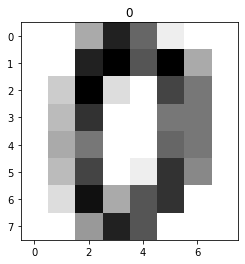

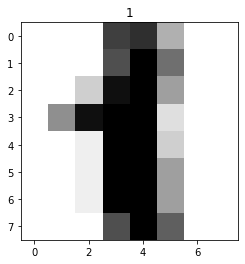

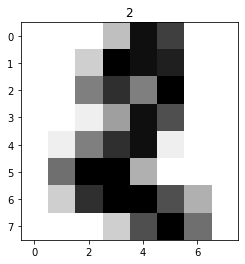

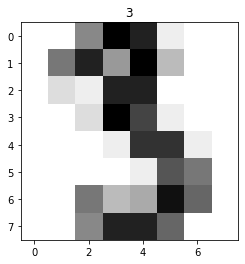

In [5]:
for i in range(4):
    plt.imshow(digits.images[i] , cmap = plt.cm.gray_r , interpolation = 'nearest')
    plt.title(str(digits.target[i]))
    plt.show()

## Displaying 10 sample digits along with the labels

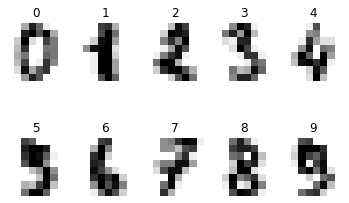

In [6]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(6,6))
for index, (image,label) in enumerate(images_and_labels[:10]):
    plt.subplot(3,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

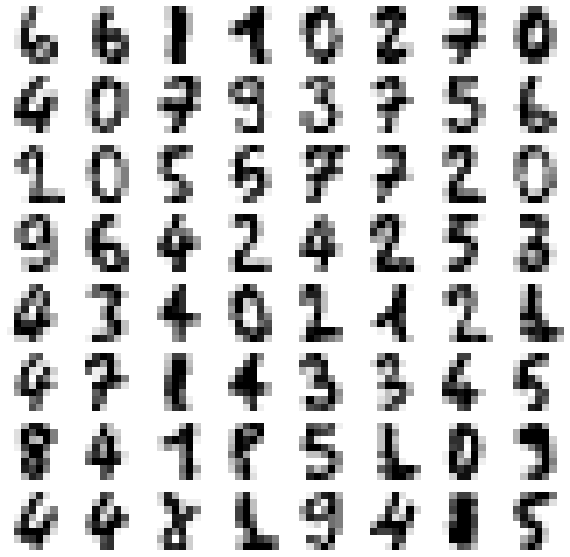

In [7]:
n_rows = 8
n_cols = 8

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
k = 0
for i, j in product(range(n_rows), range(n_cols)):
    image = images_train[n_cols * i + j]
    ax[i, j].imshow(image, cmap='binary', interpolation='none')
    ax[i, j].axis('off')

plt.show()
plt.close()

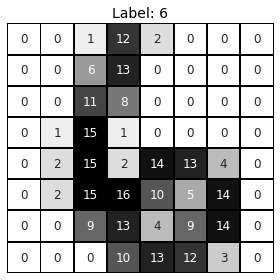

In [8]:
plt.figure(figsize=(4, 4))
index = 0
digit = images_train[index]
sns.heatmap(digit, vmin=0, vmax=15, cmap='binary', annot=True, fmt='d',
            annot_kws={'fontsize': 12}, cbar=False, linewidths=1,
            linecolor='k')
plt.xticks([])
plt.yticks([])
plt.title('Label: %d' % y_train[index], fontsize=14)
plt.tight_layout()
plt.show()
plt.close()

*Essentially, each digit is just an 8 by 8 grid of integers between 0 - 16*

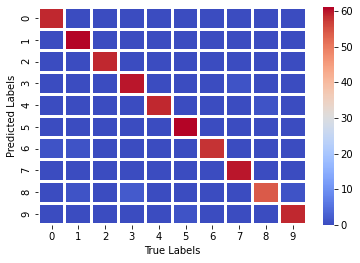

In [9]:
from sklearn import metrics
linear_model = svm.SVC(kernel='linear', degree=3, gamma='scale')
linear_model.fit(X_train,y_train)
# Predict
y_pred = linear_model.predict(X_test)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), cmap='coolwarm', linewidths=2)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

*Confusion matrix helps us to visualize differences between actuals and predictions*


## Splitting the data into input features(pixel) and output target values

In [10]:
X = digits.images.reshape((samples, -1))
y= digits.target

## Train & Test

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y) # This function splits our dataset, previously we've had 1797 elements in the dataset.
print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


*Now our data is divided into training set containing **1347** elements and test set which contains **450** elements*

### What is Kernel?

A **kernel** is a function that takes the original non-linear problem and transforms it into a linear one within the higher-dimensional space.[[7](#section8)]

## Support Vector Classifier Model with Linear Kernel

In [12]:
linear_model = svm.SVC(kernel='linear', degree=3, gamma='scale')
linear_model.fit(X_train,y_train)
# Predict
y_pred = linear_model.predict(X_test)

## Checking the accuracy

In [13]:
accuracy = linear_model.score(X_test,y_test)

In [14]:
print(f"{accuracy:.0%} accuracy, our model is performing really good, let's see if we can do better")

99% accuracy, our model is performing really good, let's see if we can do better


## Creating another model with RBF Kernel and checking its accuracy

**Radial Basis Function** is the default kernel used within the sklearn’s SVM classification algorithm and can be described with the following formula:[[8](#section9)]


<img src="https://miro.medium.com/max/546/1*A-8LqEJEyedmdePZYke-IA.png"/>

$||x - x'||^2$ - *squared [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between 2 feature vectors.*
<br>
**Gamma** - *defines how mnuch influence a single traning set has.

In [15]:
RBF_model = svm.SVC(kernel='rbf', degree=3, gamma='scale')
RBF_model.fit(X_train,y_train)
#Predict
y_pred2 = RBF_model.predict(X_test)
accuracy_2 = RBF_model.score(X_test,y_test)
print(f"{accuracy_2:.0%} accuracy, by chaning the kernel, we have increased the accuracy")

99% accuracy, by chaning the kernel, we have increased the accuracy


# End SVM
***

# Quantile Regression
***

### *The goal is to predict the delivery time based on the distance of house from the store.*

### Setup
***

In [16]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm # statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration
import statsmodels.formula.api as smf

In [17]:
data = sm.datasets.engel.load_pandas().data
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


In [18]:
X, y = make_regression(n_samples = 10000,
                      n_features =1,
                      n_informative =1,
                      n_targets = 1,
                      random_state = 7)

Xs = pd.DataFrame(X, columns = ['distance'])
ys = pd.DataFrame(y, columns= ['time'])

Xs['distance'] = Xs['distance'].apply(lambda x: 10+2 * (x +np.random.normal(loc=1)))
ys['time'] = ys['time'].apply(lambda x: 60+0.3 * (x +np.random.normal(loc=1)))

In [19]:
df = Xs.merge(ys, left_index=True, right_index = True)

In [20]:
df.describe()

,distance,time
count,10000.000000,10000.000000
mean,11.991394,60.279904
std,2.836041,1.777311
min,1.411538,53.922593
25%,10.083215,59.098371
50%,11.959428,60.289067
75%,13.875495,61.468085
max,24.107275,66.632706


In [21]:
train_df, test_df = train_test_split(df, test_size = 0.10, random_state = 7)

In [22]:
X_train, y_train = train_df[['distance']], train_df[['time']]
X_test, y_test = test_df[['distance']], test_df[['time']]

## Visualize the Data

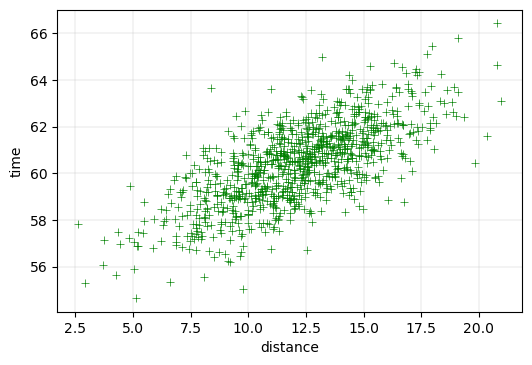

In [23]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
sns.scatterplot(data=test_df, x='distance', y ='time', marker='+', color='green')
plt.grid(linestyle='-', linewidth=0.2)

*By changing the marker value we can manipulate the symbol which will occur on the plot, for more info see [here](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers).*

# Random Forest
***

*Random Forest[[1](#section2)] is a supervised learning technique, it can be used for both Classification and Regression problems in Machine Learning, based on the concept of [ensemble learning](https://en.wikipedia.org/wiki/Ensemble_learning)*

**Benefits of Random Forest Algorithm**
- takes less training time compared to other algorithms
- predicts output with high accuracy, even for large datasets
- maintains accuracy even when large amout of data is missing


### *The goal is to predict the quality of the wine*

*Dataset taken from [here](https://archive.ics.uci.edu/ml/datasets/Wine)*

### Setup


In [24]:
import pandas as pd # Data Frames
import numpy as np
import matplotlib.pyplot as plt # Used to visualize the data in 2D graph
import seaborn as sns # Open-source Python library built on top of matplotlib.Used for data visualization and exploratory data analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


### Uploading the Red Wine Quality Dataset

In [25]:
# Loading the wine data set
df = pd.read_csv("datasets/winequality-red.csv", sep=';');


In [26]:
df.shape

(1599, 12)

In [27]:
# Displaying first 5 rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Checking if dataset contains any missing values

In [28]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

*As we can see, this particular dataset doesn't contain any missing values so we can proceed with the code*

### Data Analysis and Visualization for better data understanding

In [29]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


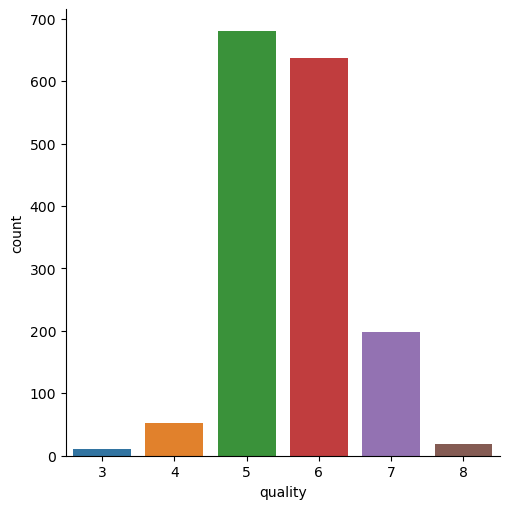

In [30]:
sns.catplot(x='quality',data = df, kind = 'count')

*This particular dataset contains a lot of mid-range quality wines, we can see that the wines that dominates here are having 5-6 quality score*

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

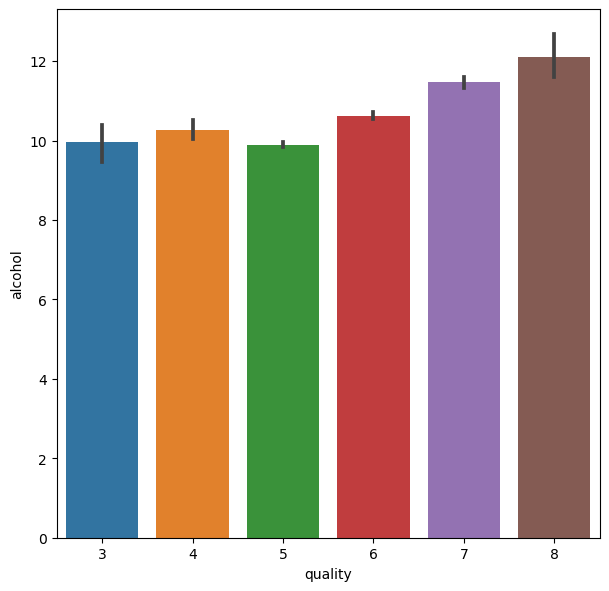

In [31]:
# Alcohol vs Quality
plot = plt.figure(figsize = (7,7))
sns.barplot(x='quality', y='alcohol', data = df)

*As we can notice from this bar plot is that better quality wines contains more alcohol*

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

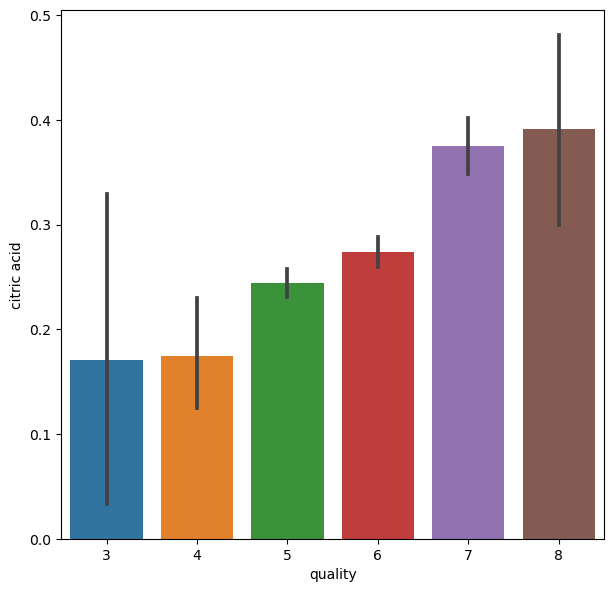

In [32]:
# Citric Acid vs Quality
plot = plt.figure(figsize = (7,7))
sns.barplot(x='quality', y='citric acid', data = df)

*The higher citric acidity value, the better the wine quality*

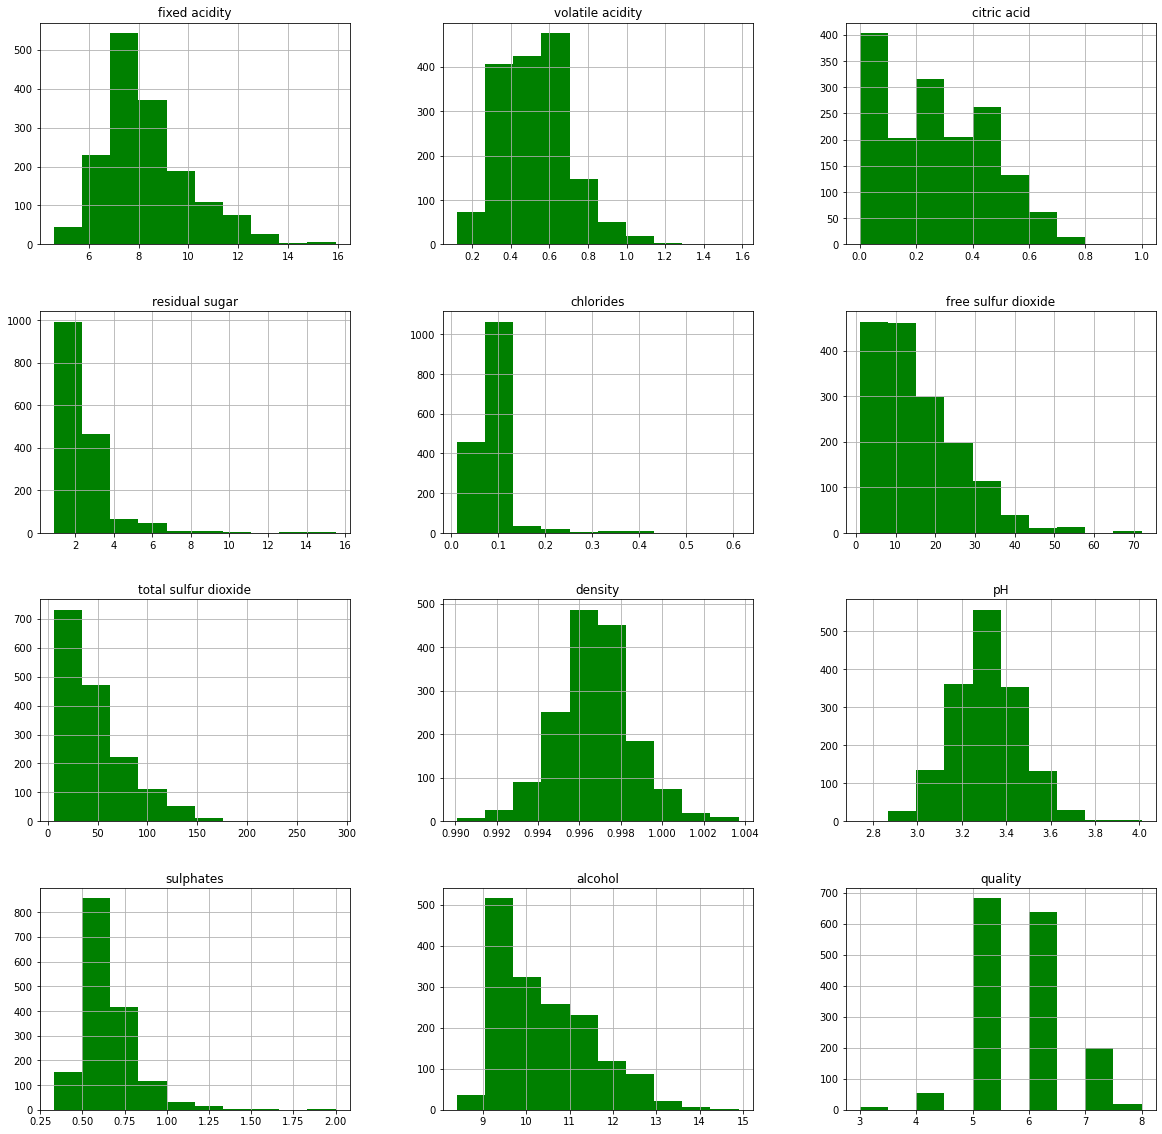

In [33]:
%matplotlib inline
df.hist(bins=10,figsize=(20,20), color="green")
# Display histogram
plt.show()

### Correlation

*Correlation is a relationship between two entities*

In [34]:
correlation = df.corr()

<AxesSubplot:>

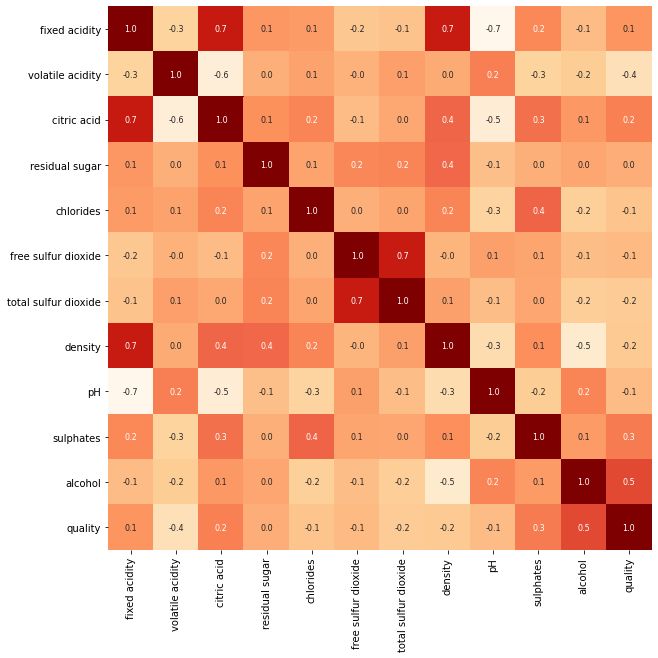

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar =False,square=True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'OrRd')

*Heatmap shows the data which depends on two independent variables as a color coded image plot.*

### Processing the Data

*Our target value is 'quality', that's why we drop it, and feed the data model with the rest of the parameters*

In [36]:
X = df.drop('quality',axis=1)

*We want to split the quality parameter on 'Good or 'Bad', let's say if the quality is > 7 the quality is 'Good'*

In [37]:
# Replace the quality value with numerical representation of 0 and 1 where 0 is Bad Quality and 1 is Good Quality
Y = df['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)

### Train & Test

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state = 7)

In [39]:
model = RandomForestClassifier()

*To train our model we need to use fit() function to fit the data points to the Random Forest Classifier*

In [40]:
model.fit(X_train,Y_train)

RandomForestClassifier()

### Checking the accuracy

In [41]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy: ',test_data_accuracy)

Accuracy:  0.8939393939393939


*Almost 90% accuracy, not bad! Our model is performing really well.*

### Building a Predictive System

In [43]:
# I've taken random row from the dataset and trying to predict the quality just for this particular instance
input = (11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8)

# Chaning the input data to numpy array
input_numpy = np.asarray(input)

# We have to reshape the data as we are tryng to predict the quality for only 1 instance
# If we won't reshape it, our model doesn't know we'are trying to predict the quality for only 1 instance and will look for all the values

reshaped_input = input_numpy.reshape(1,-1) # It tells the model we want to predict the quality for only 1 instance

pred = model.predict(reshaped_input)

*It will output either 0 or 1 where 0 is Bad Quality and 1 is Good Quality, we are expecting '0'.*

In [44]:
print(pred)

[0]


In [45]:
if(pred[0]==1):
    print('Good Quality')
else:
    print('Bad Quality')

Bad Quality


*Our model successfully predicted the quality of the wine!*

# End Random Forest
***

# References
***

[Decision Tree Classifier](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html

<a id='section2'></a>[[2] What is Random Forest Algorithm](https://www.javatpoint.com/machine-learning-random-forest-algorithm)

<a id='section3'></a>[[3] About SVM](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

<a id='section4'></a>[[4] Disadvantages and advantages of SVM](https://scikit-learn.org/stable/modules/svm.html)

<a id='section5'></a>[[5] SVM](https://en.wikipedia.org/wiki/Support-vector_machine)

<a id='section6'></a>[[6] Tool to generate gifs](https://gifs.com/dashboard/gifs)

<a id='section7'></a>[[7] About hyperplane](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989)

<a id='section8'></a>[[8] Whats is Kernel?](https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b)

<a id='section9'></a>[[9] RBF Kernel](https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b)